# GRIP @ The Sparks Foundation

# Author : Shaik Imranuddin

## Task 2 : Prediction using Unsupervised Machine Learning

In this task, I have tried to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.

## Technical Stack  : Sikit Learn, Numpy Array, Scipy, Pandas, Matplotlib

In [1]:
# Importing the libraries required

from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import sklearn.metrics as sm

import warnings as wg
wg.filterwarnings("ignore")

## 1 - Loading the dataset

In [2]:
# Reading the Iris dataset
df = pd.read_csv('csv/Iris.csv')

df.drop(['Id'],axis=1,inplace=True)

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
# to find number of rows and columns in dataset

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(150, 5)

In [6]:
# checking if there are any null values in dataset
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# dropping any duplicate records from the dataset
df.drop_duplicates(inplace=True)

In [8]:
#it calculates the statistical info of the dataframe
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 2 - Visualizing the data

In [9]:
# Label encoding

X=df.iloc[:,[0,1,2,3]].values

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.Species = le.fit_transform(df.Species)
Y=df.iloc[:,[4]].values
Y=Y.reshape(-1)

<AxesSubplot:>

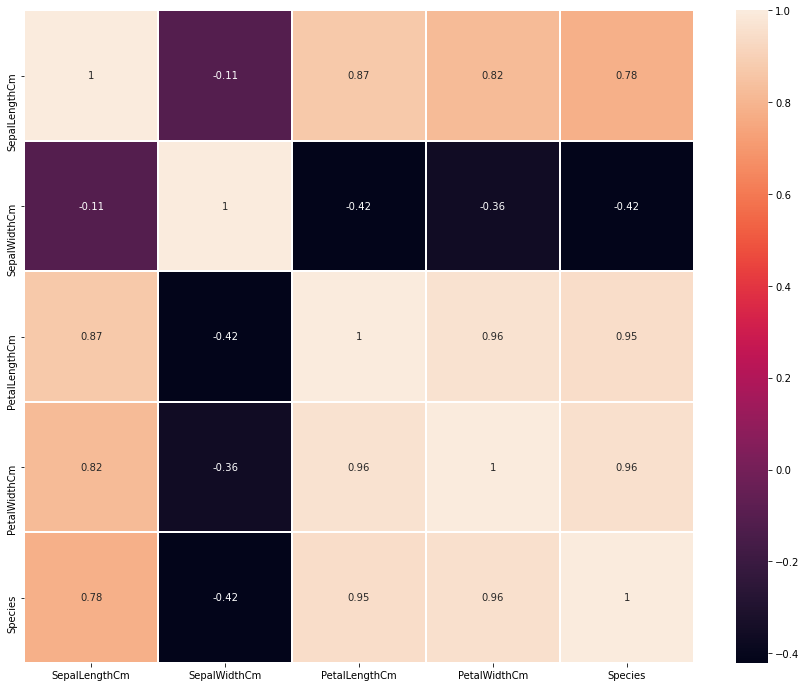

In [10]:
fig=plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),linewidths=1,annot=True)

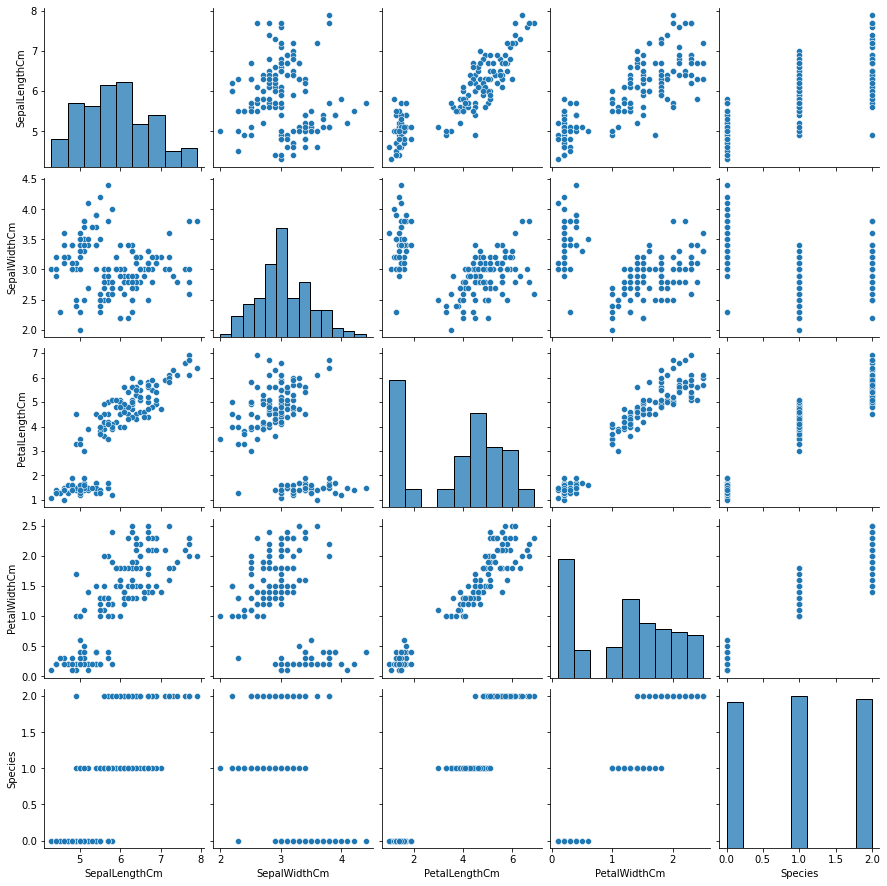

In [11]:
sns.pairplot(df)

#### From the above graphs we can conclude that petal length and petal width are better predictors since setosa is clearly separable

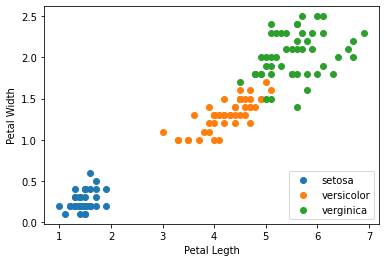

In [12]:
plt.scatter(X[Y==0,2],X[Y==0,3],label='setosa')
plt.scatter(X[Y==1,2],X[Y==1,3],label='versicolor')
plt.scatter(X[Y==2,2],X[Y==2,3],label='verginica')
plt.legend(loc='lower right')
plt.xlabel('Petal Legth')
plt.ylabel('Petal Width')
plt.show()

## 3 - Finding the optimum number of clusters

### Elbow Method using within-cluster-sum-of-squares (wcss) 

In [13]:
from sklearn.cluster import KMeans

# experimenting with some values of 'K' to deduce the optimal value

wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    km.fit(X)
    # inertia method returns wcss for that model
    wcss.append(km.inertia_)
    
wcss

[663.8952380952379,
 151.77145833333344,
 77.91989035087717,
 56.642370650183146,
 45.81642192982454,
 38.38097880813144,
 34.11707094757095,
 29.75801580972634,
 27.744997920380285,
 25.76965268228504]

### Using Elbow graph to find optimum no. of Clusters

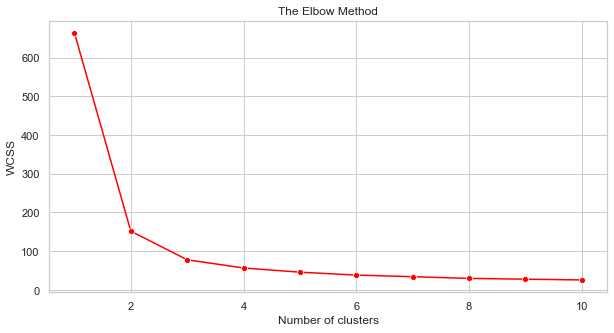

In [14]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

>The optimum value for K would be 3. As we can see that with an increase in the number of clusters the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS and we can see that after 3 the drop in wcss is minimal.

## 4 - Applying K-means++

In [15]:
# Creating K-Means classifier

km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
Y_pred = km.fit_predict(X)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## 5 - Visualizing the clusters

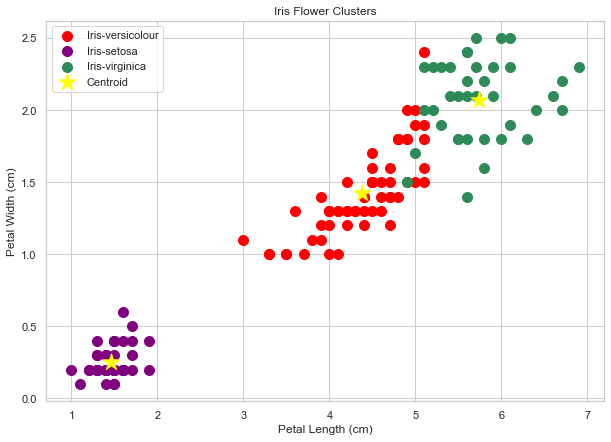

In [16]:
# Visualizing of petal length and petal width clusters

fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(X[Y_pred == 0, 2], X[Y_pred == 0, 3], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(X[Y_pred == 1, 2], X[Y_pred == 1, 3], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[Y_pred == 2, 2], X[Y_pred == 2, 3],s = 100, c = 'seagreen', label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], s = 300, c = 'yellow',marker='*', 
            label = 'Centroid')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width (cm)')
plt.xlabel('Petal Length (cm)')
plt.legend()

# Conclusion

### I was  able to successfully carry-out prediction using Unsupervised Machine Learning task and was able to evaluate the model's clustering occur

#### We were able to predict the optimum number of cluster i.e 3 for Iris dataset and visualize them with the help of scatter plot.

# Thank You